In [2]:
import pandas as pd
df = pd.read_csv("/Users/oow214/Downloads/RB_LOCAL_HOTEL_USE_CSNST_NEW_INFO_2020.csv")
# print(df['area_nm'].unique())
df = df[['xpos_lo', 'ypos_la']]

In [3]:
import numpy as np

xpos_lo = np.array(df['xpos_lo'])
ypos_la = np.array(df['ypos_la'])

xpos_lo = xpos_lo.reshape(-1,1)
ypos_la = ypos_la.reshape(-1,1)

print(xpos_lo)
print(ypos_la)

df['area_nm'].unique()

[[127.0126078]
 [127.1212276]
 [126.9908189]
 [126.9835525]
 [127.0028004]
 [126.8267215]
 [126.519265 ]
 [126.5200734]
 [127.0568837]
 [127.0235364]
 [127.0975344]
 [126.578421 ]
 [127.0354237]
 [126.8184735]
 [126.9859464]
 [129.0373247]
 [127.0201316]
 [126.8459722]
 [126.9216068]
 [127.0166679]
 [126.7093567]
 [127.0297891]
 [126.9962989]
 [126.9483605]
 [127.0337131]
 [126.9682261]
 [126.9145249]
 [126.9211856]
 [126.8825812]
 [127.0389892]
 [129.058122 ]
 [126.9809379]
 [126.9976106]
 [127.0208285]
 [126.9856085]
 [126.9876975]
 [126.6374026]
 [126.4083476]
 [126.638737 ]
 [126.9913216]
 [126.9906371]
 [129.3473935]
 [126.522019 ]
 [127.0788036]
 [126.8635837]
 [127.0354597]
 [126.6004455]
 [126.9183039]
 [126.9310275]
 [126.4305938]
 [126.9128477]
 [127.0716864]
 [129.057318 ]
 [129.0418332]
 [127.0129554]
 [129.1565486]
 [126.9064403]
 [126.8013283]
 [127.0279031]
 [126.6514767]
 [126.9764318]
 [127.029109 ]
 [126.8142917]
 [126.980923 ]
 [129.1611261]
 [127.7518523]
 [127.0055

KeyError: 'area_nm'

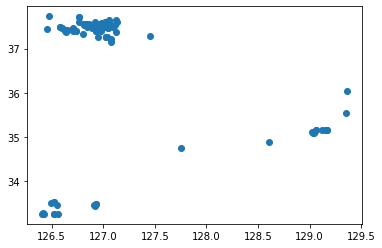

In [4]:
import matplotlib.pyplot as plt

plt.scatter(xpos_lo, ypos_la)

In [5]:
data_points = df.values

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3).fit(data_points)

In [7]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 2], dtype=int32)

In [8]:
kmeans.cluster_centers_

array([[126.94218355,  37.50616639],
       [126.61672167,  33.37808935],
       [129.01665202,  35.17572366]])

In [9]:
df['cluster_id'] = kmeans.labels_

In [10]:
df.head(12)

,xpos_lo,ypos_la,cluster_id
0,127.012608,37.486972,0
1,127.121228,37.386539,0
2,126.990819,37.564337,0
3,126.983553,37.574467,0
4,127.002800,37.565900,0
5,126.826722,37.567976,0
6,126.519265,33.254477,1
7,126.520073,33.254365,1
8,127.056884,37.521414,0
9,127.023536,37.510515,0


/Users/oow214/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


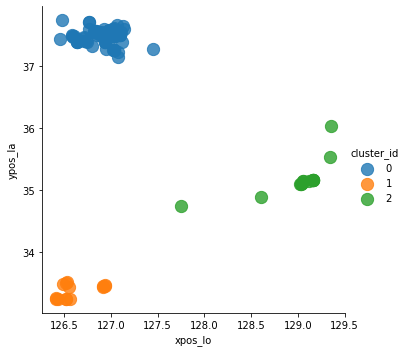

In [11]:
sns.lmplot('xpos_lo', 'ypos_la', data=df, fit_reg=False, scatter_kws={"s":150}, hue='cluster_id')

In [12]:
xy_df = df[['xpos_lo', 'ypos_la']]
y_data = df['cluster_id']

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# x_train,x_test,y_train,y_test= train_test_split(df,y_data,test_size=0.2, shuffle=True, random_state=0)

model_log = LogisticRegression(fit_intercept=True, max_iter=1000, random_state=10)

model_log.fit(xy_df,y_data)

print(model_log.score(xy_df, y_data))

x_test = pd.DataFrame({'xlog_lo':[127.05155908999349,126.48116204720625],
                    'ylog_la':[37.86672639182354, 34.64257440073534]})
print(x_test)
print(xy_df)
print("지역 : ", model_log.predict(x_test))

1.0
      xlog_lo    ylog_la
0  127.051559  37.866726
1  126.481162  34.642574
        xpos_lo    ypos_la
0    127.012608  37.486972
1    127.121228  37.386539
2    126.990819  37.564337
3    126.983553  37.574467
4    127.002800  37.565900
..          ...        ...
151  126.972065  37.559976
152  126.985690  37.564329
153  126.976548  37.568224
154  127.029397  37.517824
155  129.041933  35.116368

[156 rows x 2 columns]
지역 :  [0 1]


In [13]:
import pandas as pd
df = pd.read_csv("/Users/oow214/Downloads/Invistico_Airline.csv")
df

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


In [16]:
# from sklearn.cluster import KMeans
# # from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt

# ############ 군집화

# # k값 구하기
# ks = range(1, 10)
# intertias = []
# for k in ks:
#     model = KMeans(n_clusters=k, n_init=5)
#     model.fit(df)
#     intertias.append(model.inertia_)

# # # k값 찾기 그래프 엘보우플롯?
# # plt.figure(figsize=(8, 4))
# # plt.plot(ks, intertias, '-o')
# # plt.title('Elbow Method')
# # plt.xlabel('1 to 10')
# # plt.ylabel('intertias')

# # 차원 축소
# pca = PCA(n_components=2)
# pca_transformed = pca.fit_transform(df)

# df['pca_x'] = pca_transformed[:,0]
# df['pca_y'] = pca_transformed[:,1]



# # 군집
# kmeans = KMeans(n_clusters=3)
# kmeans.fit(df)
# print(kmeans.labels_)
# print("응집도 추출: ", kmeans.inertia_)

# # 군집화 중심점
# center = kmeans.cluster_centers_
# # print('센타', center)

# # df에 군집결과 넣기
# df['cluster'] = kmeans.labels_


# # 군집 결과 시각화
# plt.figure(figsize=(8, 4))
# plt.scatter(df['pca_x'], df['pca_y'], c=df['cluster'])
# plt.scatter(center[:,0], center[:,1], c='r', marker='s')
# plt.title('Clustering')
# plt.xlabel('pca_x')
# plt.ylabel('pca_y')

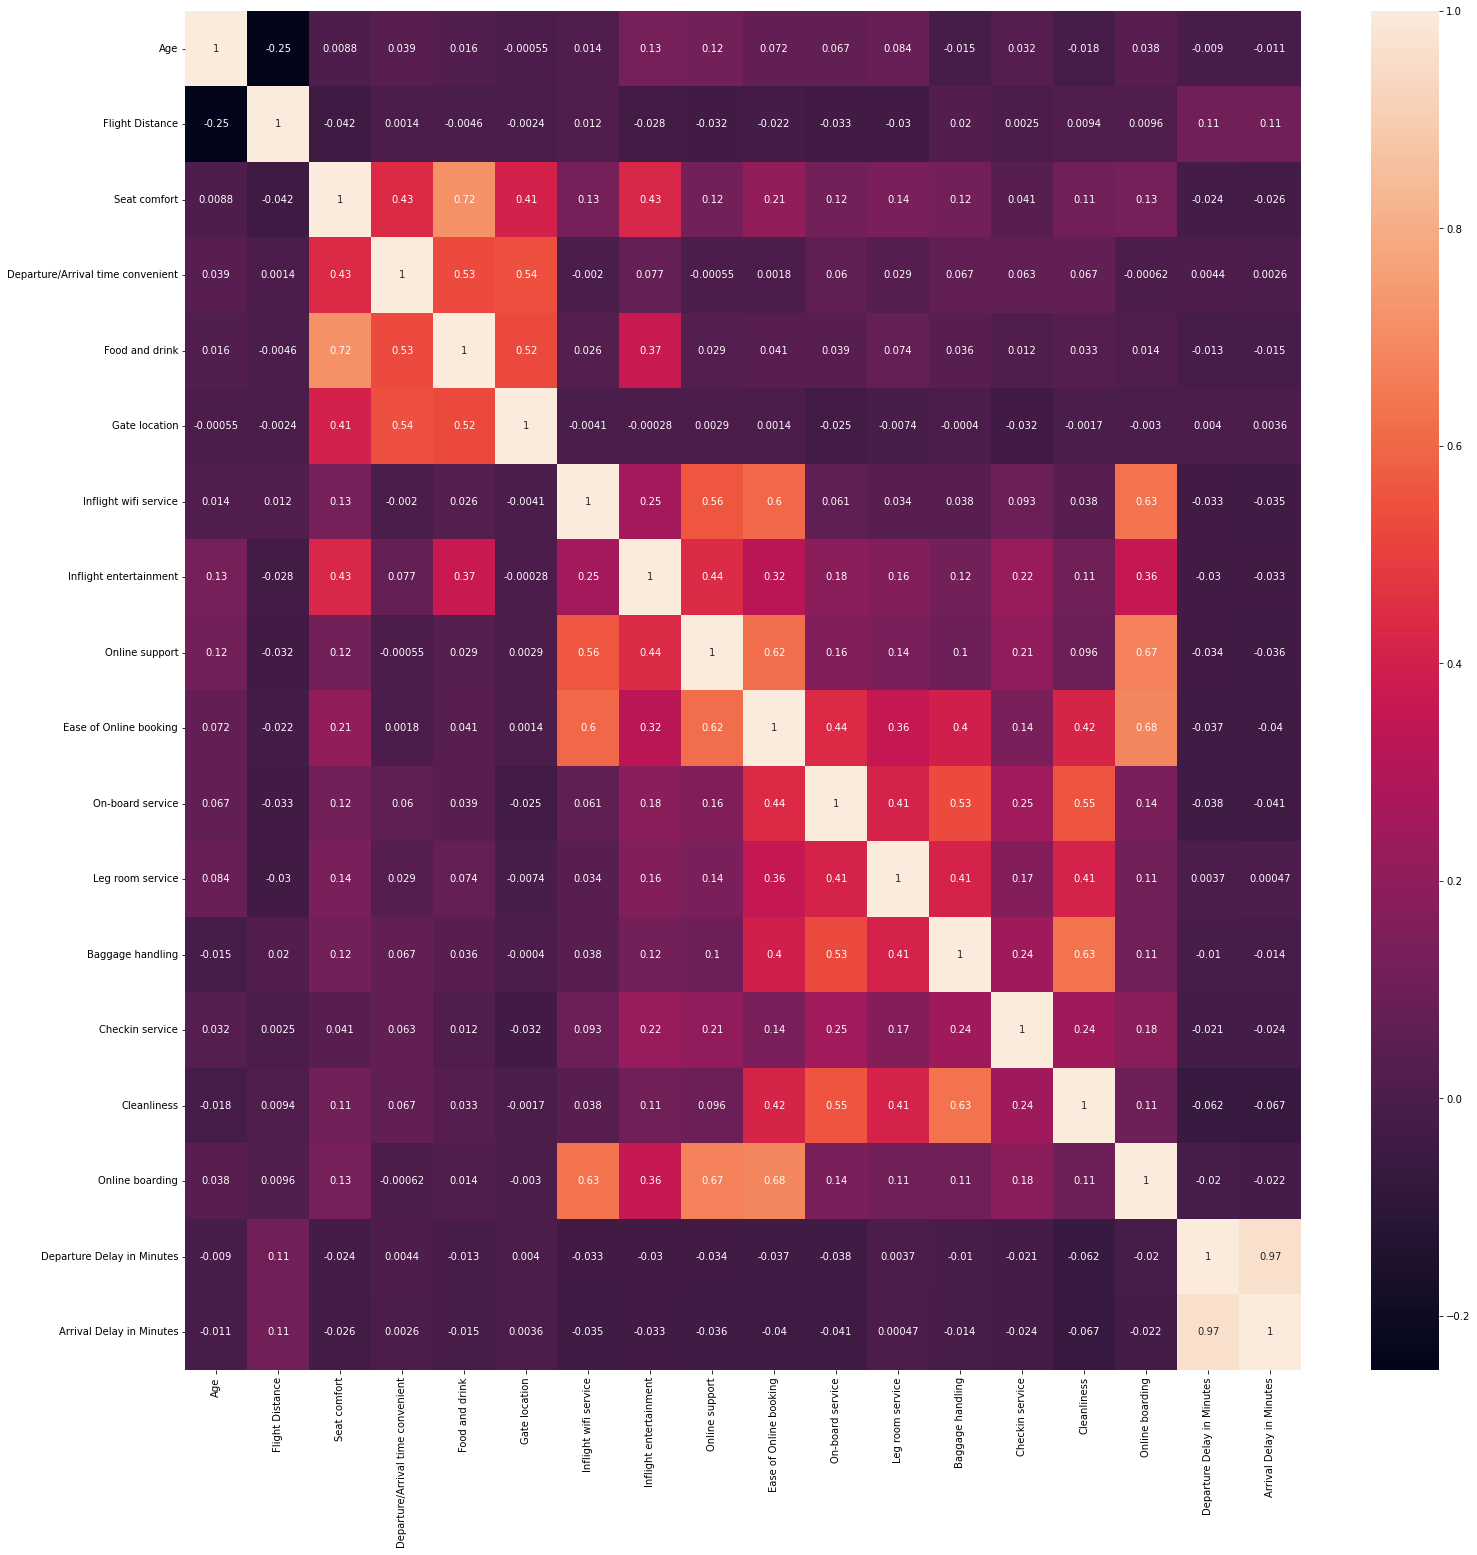

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.heatmap(df.corr(), annot=True)
plt.gcf().set_size_inches(25, 25)

In [57]:
import pandas as pd
df = pd.read_csv("/Users/oow214/Downloads/RB_LOCAL_HOTEL_USE_CSNST_NEW_INFO_2020.csv")
df.head()

,entrp_nm,load_addr,city_do_cd,city_gn_gu_cd,xpos_lo,ypos_la,area_nm,hotel_grad,tel_no,homepage_url,fctly_stsfdg_rt,snitat_stsfdg_rt,use_stsfdg_rt,lc_stsfdg_rt,base_ymd
0,E호텔,서울특별시 서초구 반포대로18길 40 E 호텔,11,11650,127.012608,37.486972,서울,3,02-521-6555,http://www.e-hotel.kr/,4.00,4.00,3.70,4.3,2020-12-31
1,JS호텔분당,경기도 성남시 분당구 황새울로311번길 36,41,41135,127.121228,37.386539,경기,3,1877-8006,http://www.jshotelbundang.com/,4.35,4.50,4.45,4.4,2020-12-31
2,나인트리프리미어호텔명동2,서울특별시 중구 마른내로 28,11,11140,126.990819,37.564337,서울,4,02-6967-0999,http://www.ninetreehotels.com/nth2/,4.40,4.55,4.55,4.3,2020-12-31
3,나인트리호텔명동,서울특별시 종로구 인사동길 49,11,11110,126.983553,37.574467,서울,3,02-750-0999,https://ninetreehotel.com/,4.15,4.30,4.30,4.7,2020-12-31
4,라마다서울동대문,서울특별시 중구 동호로 354,11,11140,127.002800,37.565900,서울,3,02-2276-3500,http://www.ramadaddm.com/main/,NaN,NaN,NaN,NaN,2020-12-31


/var/folders/jd/vg3q0btx5fq6t14zsspdn7400000gn/T/ipykernel_37925/1853311655.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)   # 평균값이나 중간값으로 대체


<AxesSubplot:>

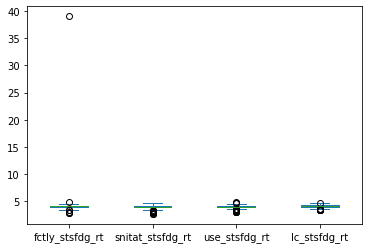

In [58]:
# %matplotlib inline     # 주피터에서 맷플롯립 사용을 위함
import pandas as pd


df.isnull().sum()
df.fillna(df.mean(), inplace=True)   # 평균값이나 중간값으로 대체
df.isnull().sum()
df.plot(kind='box', y=['fctly_stsfdg_rt', 'snitat_stsfdg_rt', 'use_stsfdg_rt', 'lc_stsfdg_rt'])

In [59]:
df[df['fctly_stsfdg_rt'] > 5]

df.loc[56, 'fctly_stsfdg_rt'] = 3.9
df.loc[[56]]

,entrp_nm,load_addr,city_do_cd,city_gn_gu_cd,xpos_lo,ypos_la,area_nm,hotel_grad,tel_no,homepage_url,fctly_stsfdg_rt,snitat_stsfdg_rt,use_stsfdg_rt,lc_stsfdg_rt,base_ymd
56,아하바 호텔,서울특별시 영등포구 영중로8길 7,11,11560,126.90644,37.518617,서울,2,02-538-5177,NaN,3.9,3.9,3.95,4.05,2020-12-31


<AxesSubplot:>

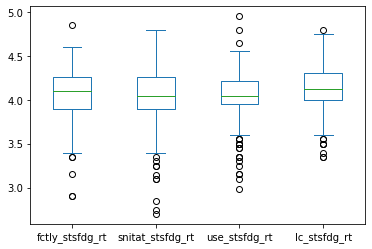

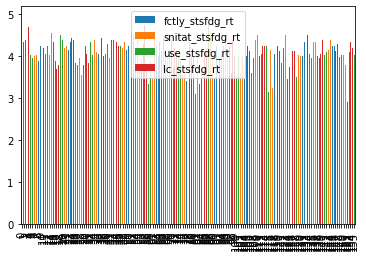

In [67]:
df.plot(kind='box', y=['fctly_stsfdg_rt', 'snitat_stsfdg_rt', 'use_stsfdg_rt', 'lc_stsfdg_rt'])
# df.plot(kind='bar', y=['fctly_stsfdg_rt', 'snitat_stsfdg_rt', 'use_stsfdg_rt', 'lc_stsfdg_rt'])

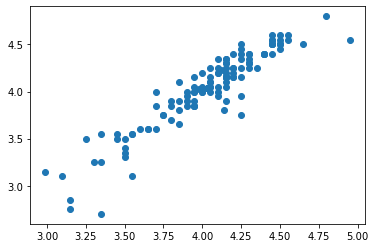

In [66]:
import numpy as np
use_stsfdg_rt = np.array(df['use_stsfdg_rt'])
fctly_stsfdg_rt = np.array(df['fctly_stsfdg_rt'])
snitat_stsfdg_rt = np.array(df['snitat_stsfdg_rt'])
lc_stsfdg_rt = np.array(df['lc_stsfdg_rt'])

# x_data = (x_data.reshape(-1,1))
# y_data = (y_data.reshape(-1,1))


import matplotlib.pyplot as plt
# plt.scatter(use_stsfdg_rt, fctly_stsfdg_rt)
plt.scatter(use_stsfdg_rt, snitat_stsfdg_rt)
# plt.scatter(use_stsfdg_rt, lc_stsfdg_rt)